In [3]:
import fastf1 as ff1
from fastf1 import plotting
from fastf1 import utils

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

quali = ff1.get_session(2024, 3, "Q")
quali.load()

req         WARNING 	DEFAULT CACHE ENABLED! (592.06 MB) /Users/epillon/Library/Caches/fastf1
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v3.3.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 19 drivers: ['1', '55', '11', '4', '16', '81', '63', '22', '18', '14', '44', '23', '77', '20', '31', '27', '10', '3', '24']


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
/Users/epillon/websites/f1Analytics.github.io/.f1-engine/lib/python3.12/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.



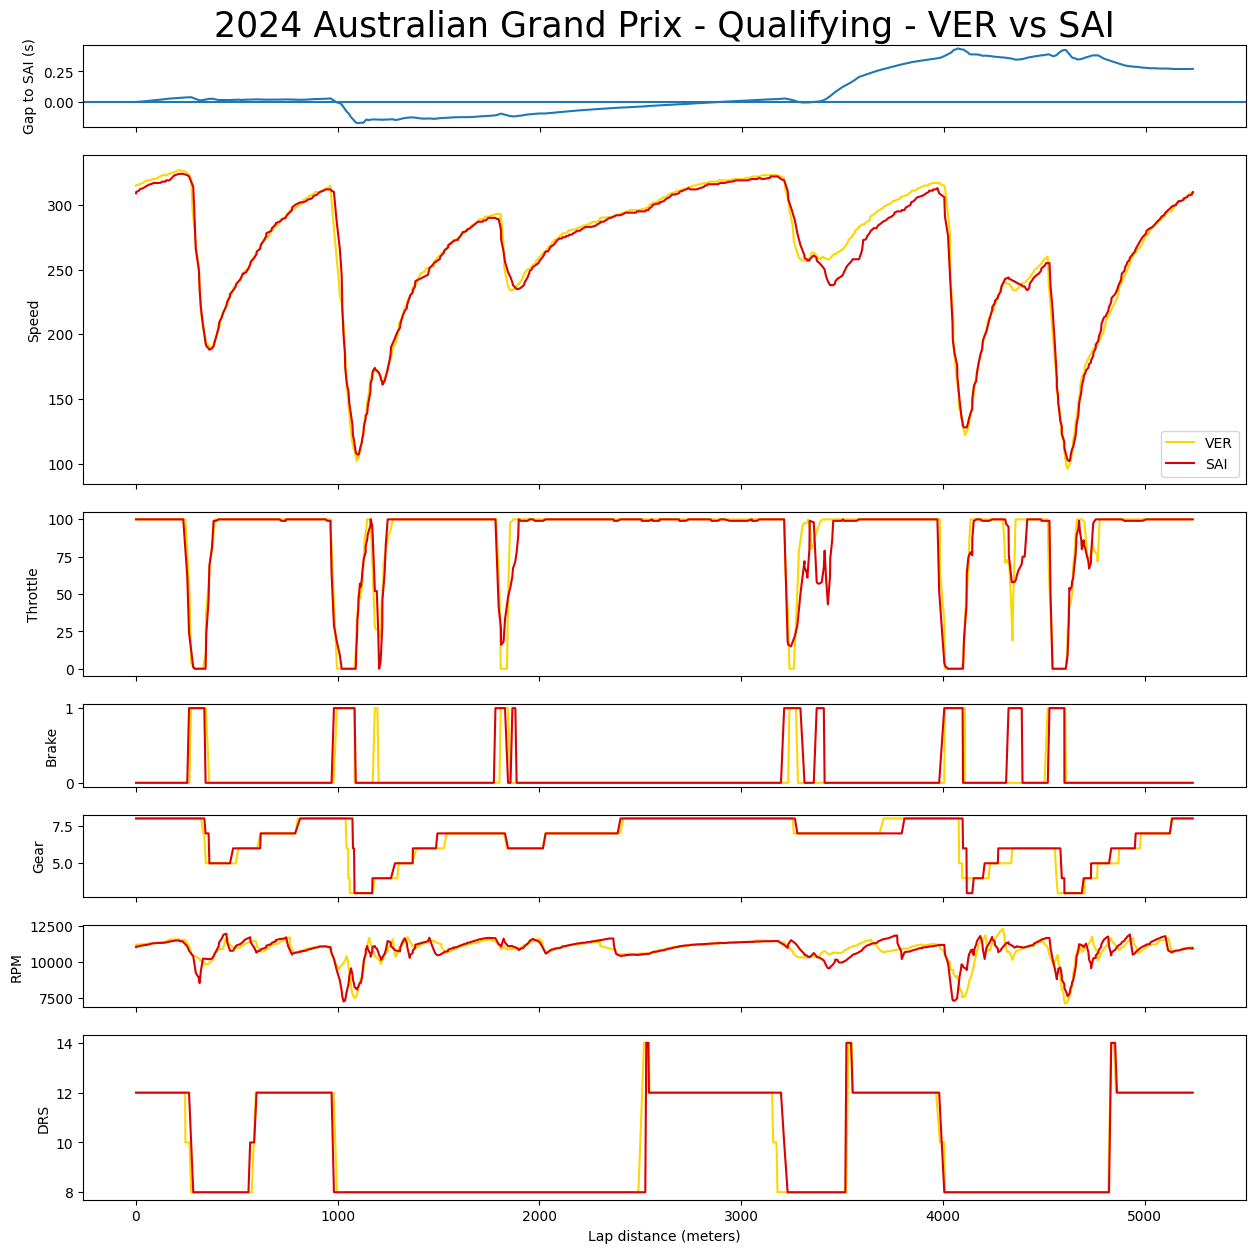

In [8]:
driver_1 = "VER"
driver_2 = "SAI"
laps_driver_1 = quali.laps.pick_driver(driver_1)
laps_driver_2 = quali.laps.pick_driver(driver_2)

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

# Make sure whe know the team name for coloring
team_driver_1 = fastest_driver_1["Team"]
team_driver_2 = fastest_driver_2["Team"]


color_driver_1 = (
    "#" + quali.results[quali.results.Abbreviation == driver_1].TeamColor.iloc[0]
)
color_driver_2 = (
    "#" + quali.results[quali.results.Abbreviation == driver_2].TeamColor.iloc[0]
)

# Extract the delta time
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

plot_size = [15, 15]
plot_title = f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} vs {driver_2}"
plot_ratios = [1, 4, 2, 1, 1, 1, 2]

# Make plot a bit bigger
plt.rcParams["figure.figsize"] = plot_size

# Create subplots with different sizes
fig, ax = plt.subplots(7, gridspec_kw={"height_ratios": plot_ratios})

# Set the plot title
ax[0].set_title(plot_title, fontsize=25)

# Delta line
ax[0].plot(ref_tel["Distance"], delta_time)
ax[0].axhline(0)
ax[0].set(ylabel=f"Gap to {driver_2} (s)")

# Speed trace
ax[1].plot(
    telemetry_driver_1["Distance"],
    telemetry_driver_1["Speed"],
    label=driver_1,
    color=ff1.plotting.team_color(team_driver_1),
)
ax[1].plot(
    telemetry_driver_2["Distance"],
    telemetry_driver_2["Speed"],
    label=driver_2,
    color=ff1.plotting.team_color(team_driver_2),
)
ax[1].set(ylabel="Speed")
ax[1].legend(loc="lower right")

# Throttle trace
ax[2].plot(
    telemetry_driver_1["Distance"],
    telemetry_driver_1["Throttle"],
    label=driver_1,
    color=ff1.plotting.team_color(team_driver_1),
)
ax[2].plot(
    telemetry_driver_2["Distance"],
    telemetry_driver_2["Throttle"],
    label=driver_2,
    color=ff1.plotting.team_color(team_driver_2),
)
ax[2].set(ylabel="Throttle")

# # Brake trace
ax[3].plot(
    telemetry_driver_1["Distance"],
    telemetry_driver_1["Brake"],
    label=driver_1,
    color=ff1.plotting.team_color(team_driver_1),
)
ax[3].plot(
    telemetry_driver_2["Distance"],
    telemetry_driver_2["Brake"],
    label=driver_2,
    color=ff1.plotting.team_color(team_driver_2),
)
ax[3].set(ylabel="Brake")

# Gear trace
ax[4].plot(
    telemetry_driver_1["Distance"],
    telemetry_driver_1["nGear"],
    label=driver_1,
    color=ff1.plotting.team_color(team_driver_1),
)
ax[4].plot(
    telemetry_driver_2["Distance"],
    telemetry_driver_2["nGear"],
    label=driver_2,
    color=ff1.plotting.team_color(team_driver_2),
)
ax[4].set(ylabel="Gear")

# RPM trace
ax[5].plot(
    telemetry_driver_1["Distance"],
    telemetry_driver_1["RPM"],
    label=driver_1,
    color=ff1.plotting.team_color(team_driver_1),
)
ax[5].plot(
    telemetry_driver_2["Distance"],
    telemetry_driver_2["RPM"],
    label=driver_2,
    color=ff1.plotting.team_color(team_driver_2),
)
ax[5].set(ylabel="RPM")

# DRS trace
ax[6].plot(
    telemetry_driver_1["Distance"],
    telemetry_driver_1["DRS"],
    label=driver_1,
    color=ff1.plotting.team_color(team_driver_1),
)
ax[6].plot(
    telemetry_driver_2["Distance"],
    telemetry_driver_2["DRS"],
    label=driver_2,
    color=ff1.plotting.team_color(team_driver_2),
)
ax[6].set(ylabel="DRS")
ax[6].set(xlabel="Lap distance (meters)")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for a in ax.flat:
    a.label_outer()

In [9]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

# Make sure we know the team name for coloring
team_driver_1 = fastest_driver_1["Team"]
team_driver_2 = fastest_driver_2["Team"]

# Extract the delta time
delta_time, ref_tel, compare_tel = utils.delta_time(fastest_driver_1, fastest_driver_2)

# Create subplots with different sizes
fig = make_subplots(
    rows=7,
    cols=1,
    vertical_spacing=0.08,
    shared_xaxes=True,
    subplot_titles=("Speed", "Throttle", "Brake", "DRS"),
)

# Delta line
fig.add_trace(
    go.Scatter(
        x=ref_tel["Distance"], y=delta_time, mode="lines", name=f"Gap to {driver_2} (s)"
    )
)
fig.add_shape(
    type="line",
    x0=min(ref_tel["Distance"]),
    y0=0,
    x1=max(ref_tel["Distance"]),
    y1=0,
    line=dict(color="black", width=2),
)

# Speed trace
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_1["Distance"],
        y=telemetry_driver_1["Speed"],
        mode="lines",
        name=driver_1,
        line=dict(color=ff1.plotting.team_color(team_driver_1)),
    )
)
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_2["Distance"],
        y=telemetry_driver_2["Speed"],
        mode="lines",
        name=driver_2,
        line=dict(color=ff1.plotting.team_color(team_driver_2)),
    )
)

# Throttle trace
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_1["Distance"],
        y=telemetry_driver_1["Throttle"],
        mode="lines",
        name=driver_1,
        line=dict(color=ff1.plotting.team_color(team_driver_1)),
    )
)
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_2["Distance"],
        y=telemetry_driver_2["Throttle"],
        mode="lines",
        name=driver_2,
        line=dict(color=ff1.plotting.team_color(team_driver_2)),
    )
)

# Brake trace
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_1["Distance"],
        y=telemetry_driver_1["Brake"],
        mode="lines",
        name=driver_1,
        line=dict(color=ff1.plotting.team_color(team_driver_1)),
    )
)
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_2["Distance"],
        y=telemetry_driver_2["Brake"],
        mode="lines",
        name=driver_2,
        line=dict(color=ff1.plotting.team_color(team_driver_2)),
    )
)

# Gear trace
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_1["Distance"],
        y=telemetry_driver_1["nGear"],
        mode="lines",
        name=driver_1,
        line=dict(color=ff1.plotting.team_color(team_driver_1)),
    )
)
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_2["Distance"],
        y=telemetry_driver_2["nGear"],
        mode="lines",
        name=driver_2,
        line=dict(color=ff1.plotting.team_color(team_driver_2)),
    )
)

# RPM trace
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_1["Distance"],
        y=telemetry_driver_1["RPM"],
        mode="lines",
        name=driver_1,
        line=dict(color=ff1.plotting.team_color(team_driver_1)),
    )
)
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_2["Distance"],
        y=telemetry_driver_2["RPM"],
        mode="lines",
        name=driver_2,
        line=dict(color=ff1.plotting.team_color(team_driver_2)),
    )
)

# DRS trace
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_1["Distance"],
        y=telemetry_driver_1["DRS"],
        mode="lines",
        name=driver_1,
        line=dict(color=ff1.plotting.team_color(team_driver_1)),
    )
)
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_2["Distance"],
        y=telemetry_driver_2["DRS"],
        mode="lines",
        name=driver_2,
        line=dict(color=ff1.plotting.team_color(team_driver_2)),
    )
)

# Update layout
fig.update_layout(
    title=f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} vs {driver_2}",
    xaxis=dict(title="Lap distance (meters)"),
    yaxis=dict(title="Values"),
    yaxis2=dict(title="Gap to {driver_2} (s)"),
    yaxis3=dict(title="Speed"),
    yaxis4=dict(title="Throttle"),
    yaxis5=dict(title="Brake"),
    yaxis6=dict(title="Gear"),
    yaxis7=dict(title="RPM"),
    yaxis8=dict(title="DRS"),
)

fig.show()

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.
/Users/epillon/websites/f1Analytics.github.io/.f1-engine/lib/python3.12/site-packages/fastf1/utils.py:91: FutureWarning:

`utils.delta_time` is considered deprecated and willbe modified or removed in a future release because it hasa tendency to give inaccurate results.



In [16]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# for the dash GUI we can allow the user the define their own widths

row_heights = [2, 5, 3, 3, 3, 3]
adj_row_heights = [i / sum(row_heights) for i in row_heights]

template = "plotly_dark"
fig = make_subplots(
    rows=len(adj_row_heights),
    cols=1,
    row_heights=adj_row_heights,
)

# Delta line
fig.add_trace(
    go.Scatter(
        x=ref_tel["Distance"], y=delta_time, mode="lines", name=f"Gap to {driver_2} (s)"
    ),
    row=1,
    col=1,
)

# Speed trace driver 1
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_1["Distance"],
        y=telemetry_driver_1["Speed"],
        mode="lines",
        name=driver_1,
        line=dict(color=color_driver_1),
    ),
    row=2,
    col=1,
)

# Speed trace driver 2
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_2["Distance"],
        y=telemetry_driver_2["Speed"],
        mode="lines",
        name=driver_2,
        line=dict(color=color_driver_2),
    ),
    row=2,
    col=1,
)

# brake trace driver 1
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_1["Distance"],
        y=telemetry_driver_1["Brake"],
        mode="lines",
        name=driver_1,
        line=dict(color=color_driver_1),
    ),
    row=3,
    col=1,
)

# brake trace driver 2
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_2["Distance"],
        y=telemetry_driver_2["Brake"],
        mode="lines",
        name=driver_2,
        line=dict(color=color_driver_2),
    ),
    row=3,
    col=1,
)

# Gear trace
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_1["Distance"],
        y=telemetry_driver_1["nGear"],
        mode="lines",
        name=driver_1,
        line=dict(color=color_driver_1),
    ),
    row=4,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_2["Distance"],
        y=telemetry_driver_2["nGear"],
        mode="lines",
        name=driver_2,
        line=dict(color=color_driver_2),
    ),
    row=4,
    col=1,
)

# RPM trace
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_1["Distance"],
        y=telemetry_driver_1["RPM"],
        mode="lines",
        name=driver_1,
        line=dict(color=color_driver_1),
    ),
    row=5,
    col=1,
)

fig.add_trace(
    go.Scatter(
        x=telemetry_driver_2["Distance"],
        y=telemetry_driver_2["RPM"],
        mode="lines",
        name=driver_2,
        line=dict(color=color_driver_2),
    ),
    row=5,
    col=1,
)

# DRS trace
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_1["Distance"],
        y=telemetry_driver_1["DRS"],
        mode="lines",
        name=driver_1,
        line=dict(color=color_driver_1),
    ),
    row=6,
    col=1,
)
fig.add_trace(
    go.Scatter(
        x=telemetry_driver_2["Distance"],
        y=telemetry_driver_2["DRS"],
        mode="lines",
        name=driver_2,
        line=dict(color=color_driver_2),
    ),
    row=6,
    col=1,
)

fig.update_layout(
    height=1000,
    width=1000,
    title=f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} vs {driver_2}",
    xaxis=dict(title="Lap distance (meters)"),
    template="plotly_dark",
)

fig.show()

# # Update layout
# fig.update_layout(
#     title=f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} vs {driver_2}",
#     xaxis=dict(title="Lap distance (meters)"),
#     yaxis=dict(title="Values"),
#     yaxis2=dict(title="Gap to {driver_2} (s)"),
#     yaxis3=dict(title="Speed"),
#     yaxis4=dict(title="Throttle"),
#     yaxis5=dict(title="Brake"),
#     yaxis6=dict(title="Gear"),
#     yaxis7=dict(title="RPM"),
#     yaxis8=dict(title="DRS"),
# )

# fig.show()

In [17]:
laps_driver_1.columns

Index(['Time', 'Driver', 'DriverNumber', 'LapTime', 'LapNumber', 'Stint',
       'PitOutTime', 'PitInTime', 'Sector1Time', 'Sector2Time', 'Sector3Time',
       'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
       'SpeedI1', 'SpeedI2', 'SpeedFL', 'SpeedST', 'IsPersonalBest',
       'Compound', 'TyreLife', 'FreshTyre', 'Team', 'LapStartTime',
       'LapStartDate', 'TrackStatus', 'Position', 'Deleted', 'DeletedReason',
       'FastF1Generated', 'IsAccurate'],
      dtype='object')

In [57]:
class LapFigure:
    _TEAM_COLORS = {
        "Mercedes": "#00D2BE",
    }

    def __init__(
        self,
        data: pd.DataFrame | list[pd.DataFrame],
        driver_name: str | list[str],
        driver_color: str | list[str],
    ) -> None:
        self.data = data
        self.driver_name = driver_name
        self.driver_color = driver_color

    def new(self):
        self.fig = go.Figure()

    def add_generic_trace(
        self,
        y_label: str,
        row: int,
        name: str = None,
        col: int = 1,
        x_label: str = "Distance",
        mode: str = "lines",
        showlegend: bool = False,
    ):
        if name is None:
            name = self.driver_name
        self.fig.add_trace(
            go.Scatter(
                x=self.data[x_label],
                y=self.data[y_label],
                mode=mode,
                name=name,
                line=dict(color=self.driver_color),
                showlegend=showlegend,
            ),
            row=row,
            col=col,
        )


# class LapComparisonFigure(LapFigure):
#     def __init__(
#         self, data: pd.DataFrame, driver_name: str, driver_color: str, fig=None
#     ) -> None:
#         super().__init__(data, driver_name, driver_color)


class QualiLapFigure(LapFigure):
    _default_weights = {
        "Gap": 2,
        "Speed": 5,
        "Throttle": 2,
        "Brake": 2,
        "nGear": 2,
        "RPM": 4,
        "DRS": 2,
    }
    _template = "plotly_dark"
    _default_graphs = ["Gap"]
    _graphs = ["Speed", "Throttle", "Brake", "nGear", "RPM", "DRS"]

    def __init__(
        self, data: pd.DataFrame, driver_name: str, driver_color: str, fig=None
    ) -> None:
        super().__init__(data, driver_name, driver_color)
        self.graphs = None
        self._row_heights = None

        self.set_graphs()

    @property
    def row_heights(self):
        return [i / sum(self._row_heights) for i in self._row_heights]

    def get_all_graphs(self):
        return self._graphs + self._default_graphs

    def new(self):
        self.fig = make_subplots(
            rows=len(self.graphs),
            cols=1,
            row_heights=adj_row_heights,
        )

    @property
    def template(self):
        return self._template

    @template.setter
    def template(self, value):
        if value not in [
            "plotly",
            "plotly_white",
            "plotly_dark",
            "ggplot2",
            "seaborn",
            "simple_white",
            "none",
        ]:
            raise ValueError(f"Invalid template: {value}")
        self._template = value

    # def compare_lap(self, other: LapFigure):
    def set_graphs(self):
        self.graphs = self._default_graphs + self._graphs
        self._row_heights = [
            self._default_weights.get(graph, 1) for graph in self.graphs
        ]

    def new(self):
        self.fig = make_subplots(
            rows=len(self.graphs),
            cols=1,
            row_heights=self.row_heights,
            vertical_spacing=0.08,
            shared_xaxes=True,
            subplot_titles=self.graphs,
        )

    def fill_figure(self):
        start = len(self._default_graphs) + 1
        for index, col in enumerate(self._graphs, start=start):
            self.add_generic_trace(
                y_label=col,
                row=index,
                name=self.driver_name,
                x_label="Distance",
                mode="lines",
                showlegend=True if index == start else False,
            )

    # def adjust_figure(self):
    def update_layout(self, height=1000, width=1000):
        self.fig.update_layout(
            height=height,
            width=width,
            # title=f"{quali.event.year} {quali.event.EventName} - {quali.name} - {driver_1} vs {driver_2}",
            xaxis=dict(title="Lap distance (meters)"),
            template="plotly_dark",
            # showlegend=False,
        )


class QualiLapComparisonFigure(LapFigure):
    def __init__(
        self,
        data: list[pd.DataFrame] = None,
        driver_name: list[str] = None,
        driver_color: list[str] = None,
    ) -> None:
        super().__init__(data, driver_name, driver_color)

    def new(self, rows, cols):
        self.fig = make_subplots(rows=rows, cols=cols)

    def fill_figure(self):
        return None

    def new(self, rows, cols, row_heights=None, graphs=None):
        self.fig = make_subplots(
            rows=rows,
            cols=cols,
            row_heights=self.row_heights,
            vertical_spacing=0.08,
            shared_xaxes=True,
            subplot_titles=self.graphs,
        )

    @classmethod
    def compare_laps(cls, laps: list[QualiLapFigure]) -> "QualiLapComparisonFigure":
        check_figures_are_compatible(laps)
        comparison = cls(
            data=[lap.data for lap in laps],
            driver_name=[
                lap.driver_name for lap in laps
            ],  # lapFigure_1.driver_name, lapFigure_2.driver_name],
            driver_color=[
                lap.driver_color for lap in laps
            ],  # lapFigure_1.driver_color, lapFigure_2.driver_color],
        )

        rrows, rcols = laps[0].fig._get_subplot_rows_columns()
        rows, cols = max(rrows), max(rcols)

        comparison.fig = make_subplots(
            rows=rows,
            cols=cols,
            row_heights=laps[0]._row_heights,
            vertical_spacing=0.08,
            shared_xaxes=True,
            subplot_titles=laps[0].graphs,
        )
        
        comparison.fig.layout = laps[0].fig.layout
        comparison.fig.layout.template = laps[0].fig.layout.template

        for row in rrows:
            for col in rcols:
                for lap in laps:
                    for trace in lap.fig.select_traces(row=row, col=col):
                        comparison.fig.add_trace(trace, row=row, col=col)

        return comparison


def check_figures_are_compatible(laps: list[QualiLapFigure]):
    assert len(laps) > 1, "Must provide at least two laps"
    # rows and cols
    # _row_heights
    row_heights = laps[0]._row_heights
    assert all(
        lap._row_heights == row_heights for lap in laps[1:]
    ), "Must provide same row heights"
    # graphs
    gr = laps[0].graphs
    assert all(lap.graphs == gr for lap in laps[1:]), "Must provide same graphs"
    assert len(set(lap.driver_name for lap in laps)) == len(
        laps
    ), "Must provide unique driver names"

In [58]:
quali = ff1.get_session(2024, 4, "Q")
quali.load()

driver_1 = "VER"
driver_2 = "SAI"
laps_driver_1 = quali.laps.pick_driver(driver_1)
laps_driver_2 = quali.laps.pick_driver(driver_2)

# Select the fastest lap
fastest_driver_1 = laps_driver_1.pick_fastest()
fastest_driver_2 = laps_driver_2.pick_fastest()

# Retrieve the telemetry and add the distance column
telemetry_driver_1 = fastest_driver_1.get_telemetry().add_distance()
telemetry_driver_2 = fastest_driver_2.get_telemetry().add_distance()

# Make sure whe know the team name for coloring
team_driver_1 = fastest_driver_1["Team"]
team_driver_2 = fastest_driver_2["Team"]


color_driver_1 = (
    "#" + quali.results[quali.results.Abbreviation == driver_1].TeamColor.iloc[0]
)
color_driver_2 = (
    "#" + quali.results[quali.results.Abbreviation == driver_2].TeamColor.iloc[0]
)

core           INFO 	Loading data for Japanese Grand Prix - Qualifying [v3.3.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '55', '14', '81', '44', '16', '63', '22', '3', '27', '77', '23', '31', '18', '10', '20', '2', '24']
core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNIN

In [59]:
def get_image(
    data=telemetry_driver_1, driver_name=driver_1, driver_color=color_driver_1
):
    lapfigure = QualiLapFigure(
        data=data, driver_name=driver_name, driver_color=driver_color
    )
    lapfigure.new()
    lapfigure.fill_figure()
    lapfigure.update_layout()

    lapfigure.fig.show()
    return lapfigure


verstappen = get_image(
    data=telemetry_driver_1, driver_name=driver_1, driver_color=color_driver_1
)
sainz = get_image(
    data=telemetry_driver_2, driver_name=driver_2, driver_color=color_driver_2
)

final = QualiLapComparisonFigure.compare_laps([verstappen, sainz])
final.fig.show()

In [25]:
for index, traces in enumerate(zip(sainz.fig.select_traces(), verstappen.fig.select_traces())):
    print(index, traces)

0 (Scatter({
    'line': {'color': '#E80020'},
    'mode': 'lines',
    'name': 'SAI',
    'showlegend': True,
    'x': array([   0.        ,    9.79166667,   15.29444444, ..., 5767.12083333,
                5769.4975    , 5778.5       ]),
    'xaxis': 'x2',
    'y': array([280, 282, 283, ..., 274, 276, 277]),
    'yaxis': 'y2'
}), Scatter({
    'line': {'color': '#3671C6'},
    'mode': 'lines',
    'name': 'VER',
    'showlegend': True,
    'x': array([0.00000000e+00, 4.85666667e+00, 2.07922222e+01, ..., 5.74407444e+03,
                5.74724778e+03, 5.76340028e+03]),
    'xaxis': 'x2',
    'y': array([281, 282, 284, ..., 270, 272, 273]),
    'yaxis': 'y2'
}))
1 (Scatter({
    'line': {'color': '#E80020'},
    'mode': 'lines',
    'name': 'SAI',
    'showlegend': False,
    'x': array([   0.        ,    9.79166667,   15.29444444, ..., 5767.12083333,
                5769.4975    , 5778.5       ]),
    'xaxis': 'x3',
    'y': array([99, 99, 99, ..., 99, 99, 99]),
    'yaxis': 'y3'
}), 

In [26]:
check_figures_are_compatible(sainz, verstappen)

AttributeError: 'QualiLapFigure' object has no attribute 'layout'

In [56]:
sainz.fig.layout == verstappen.fig.layout
sainz.fig.layout.template == verstappen.fig.layout.template

True

In [40]:
for x in range(1, 2):
    print(x)

1


In [41]:
max(range(1, 2))

1